<a href="https://colab.research.google.com/github/Fikrilogic/Process_Mining_Learning/blob/main/inductive_miner_heuristics_miner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import io
import pandas as pd

In [3]:
file = files.upload()

Saving running-example.csv to running-example.csv


In [24]:
df = pd.read_csv('running-example.csv', sep=";", low_memory=False)

In [25]:
df.head()

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara


In [26]:
data = df[['case_id', 'activity', 'timestamp']]
data

,case_id,activity,timestamp
0,3,register request,2010-12-30 14:32:00+01:00
1,3,examine casually,2010-12-30 15:06:00+01:00
2,3,check ticket,2010-12-30 16:34:00+01:00
3,3,decide,2011-01-06 09:18:00+01:00
4,3,reinitiate request,2011-01-06 12:18:00+01:00
5,3,examine thoroughly,2011-01-06 13:06:00+01:00
6,3,check ticket,2011-01-08 11:43:00+01:00
7,3,decide,2011-01-09 09:55:00+01:00
8,3,pay compensation,2011-01-15 10:45:00+01:00
9,2,register request,2010-12-30 11:32:00+01:00


In [27]:
data['case_id'] = data['case_id'].astype(str)
data['timestamp'] = pd.to_datetime(data['timestamp'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype                               
---  ------     --------------  -----                               
 0   case_id    42 non-null     object                              
 1   activity   42 non-null     object                              
 2   timestamp  42 non-null     datetime64[ns, pytz.FixedOffset(60)]
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), object(2)
memory usage: 1.1+ KB


In [29]:
!pip install pm4py

In [30]:
import pm4py as pm4
from pm4py.statistics.traces.generic.pandas import case_statistics

In [31]:
data = data.rename(columns={'case_id': 'case:concept:name', 'activity':'concept:name', 'timestamp': 'time:timestamp'})
start = pm4.get_start_activities(data)
df_start_activities = pm4.filter_start_activities(data,['register request'])
df_start_activities

,case:concept:name,concept:name,time:timestamp
0,3,register request,2010-12-30 14:32:00+01:00
1,3,examine casually,2010-12-30 15:06:00+01:00
2,3,check ticket,2010-12-30 16:34:00+01:00
3,3,decide,2011-01-06 09:18:00+01:00
4,3,reinitiate request,2011-01-06 12:18:00+01:00
5,3,examine thoroughly,2011-01-06 13:06:00+01:00
6,3,check ticket,2011-01-08 11:43:00+01:00
7,3,decide,2011-01-09 09:55:00+01:00
8,3,pay compensation,2011-01-15 10:45:00+01:00
9,2,register request,2010-12-30 11:32:00+01:00


In [32]:
end_activities = pm4.get_end_activities(df_start_activities)
df_filtered_end = pm4.filter_end_activities(df_start_activities, end_activities)
df_filtered_end

,case:concept:name,concept:name,time:timestamp
0,3,register request,2010-12-30 14:32:00+01:00
1,3,examine casually,2010-12-30 15:06:00+01:00
2,3,check ticket,2010-12-30 16:34:00+01:00
3,3,decide,2011-01-06 09:18:00+01:00
4,3,reinitiate request,2011-01-06 12:18:00+01:00
5,3,examine thoroughly,2011-01-06 13:06:00+01:00
6,3,check ticket,2011-01-08 11:43:00+01:00
7,3,decide,2011-01-09 09:55:00+01:00
8,3,pay compensation,2011-01-15 10:45:00+01:00
9,2,register request,2010-12-30 11:32:00+01:00


In [49]:
#convert data to log
from pm4py.objects.conversion.log import converter as log_converter
log = log_converter.apply(df_filtered_end)
log

[{'attributes': {'concept:name': '3'}, 'events': [{'concept:name': 'register request', 'time:timestamp': Timestamp('2010-12-30 14:32:00+0100', tz='pytz.FixedOffset(60)')}, '..', {'concept:name': 'pay compensation', 'time:timestamp': Timestamp('2011-01-15 10:45:00+0100', tz='pytz.FixedOffset(60)')}]}, '....', {'attributes': {'concept:name': '4'}, 'events': [{'concept:name': 'register request', 'time:timestamp': Timestamp('2011-01-06 15:02:00+0100', tz='pytz.FixedOffset(60)')}, '..', {'concept:name': 'reject request', 'time:timestamp': Timestamp('2011-01-12 15:44:00+0100', tz='pytz.FixedOffset(60)')}]}]

In [50]:
#Discovery model inductive miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

net, initial_marking, final_marking = inductive_miner.apply(log)


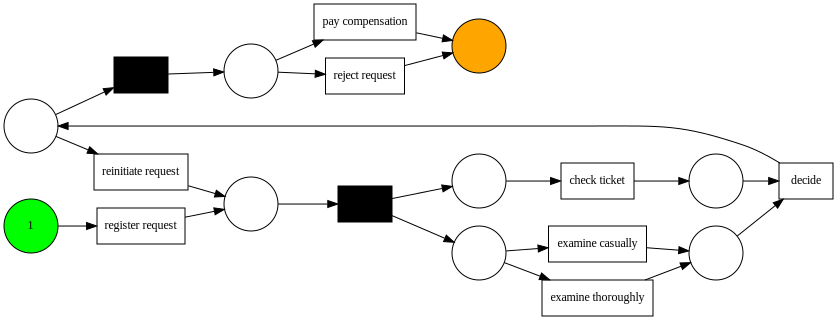

In [51]:
from pm4py.visualization.petri_net import visualizer as pn_visualization
gviz = pn_visualization.apply(net, initial_marking, final_marking)
pn_visualization.save(gviz, 'Inductive_miner_model_pn.png')
gviz

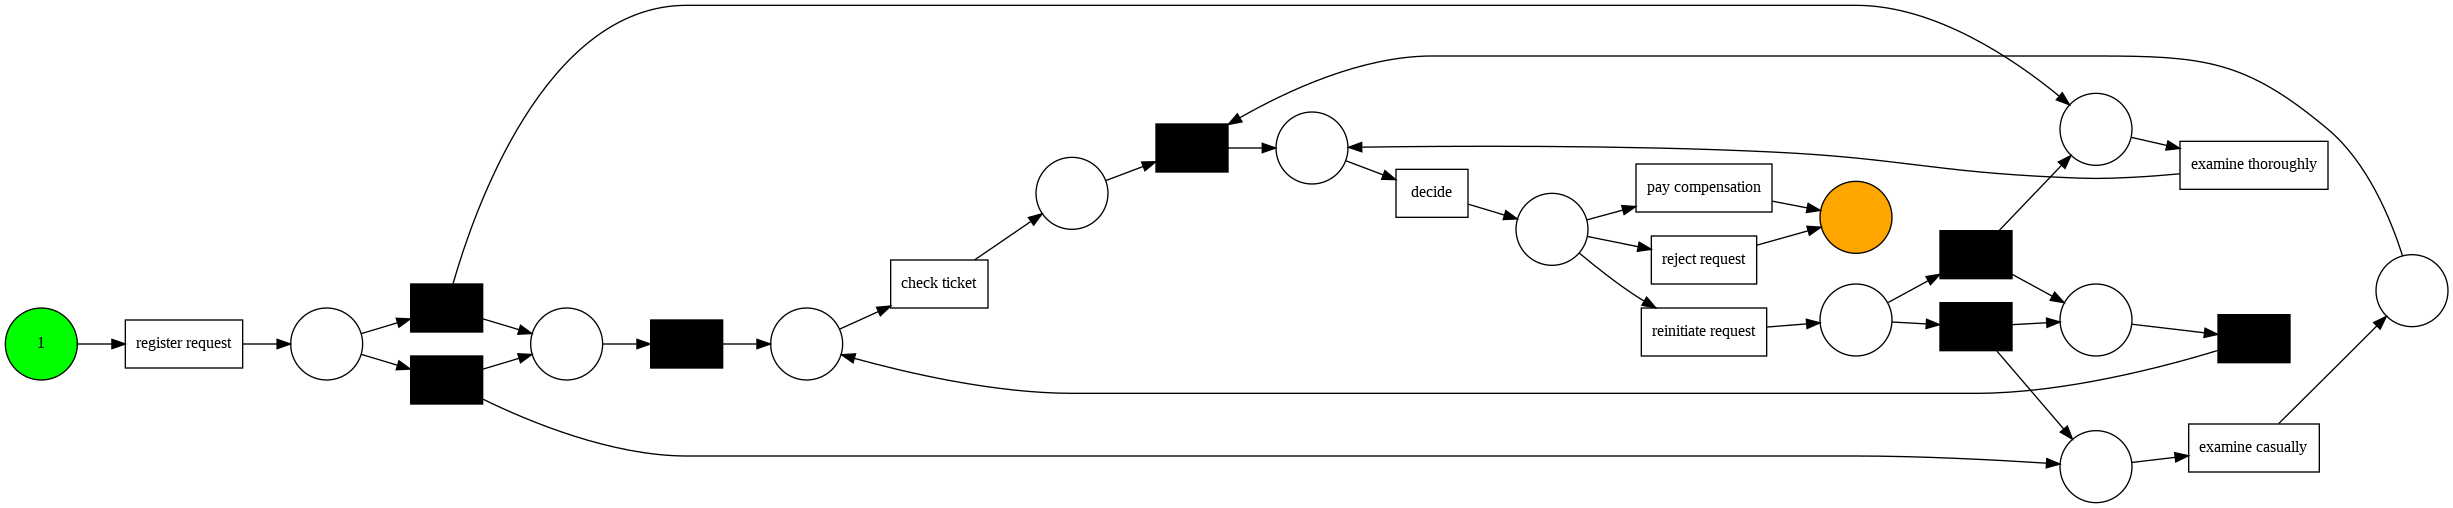

In [56]:
#discovery model with heuristic_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.petri_net import visualizer as pn_visualization

net, im, fm = heuristics_miner.apply(log)
gviz = pn_visualization.apply(net, im, fm)
pn_visualization.save(gviz, "heuristic_model_pn.png")
pn_visualization.view(gviz)